<a href="https://colab.research.google.com/github/meliksahb/Design-of-Intelligent-Machines-ME536-/blob/main/ME536_SVD_YouHideImageInHighD_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# **Melikşah Beşir e2738425**

# **ME 536**

### Hide Words In High Dimensions
### then find and count them :)

In [1]:
# only importing from following libraries are allowed. You can add more imports from them, but no new libraries here
from skimage import io
from skimage.filters import threshold_otsu as otsu
import numpy as np
from scipy.linalg import orth
from numpy.linalg import matrix_rank as rank
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn


# also import the matrix printing function
!rm bug_numpy_utils.py 2> dump.me
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import CData as CMe
from bug_numpy_utils import GenerateDataforImage as GenImMat
from bug_numpy_utils import text2mat

--2024-12-02 17:49:54--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18456 (18K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  18.02K  --.-KB/s    in 0.001s  

2024-12-02 17:49:54 (22.6 MB/s) - ‘bug_numpy_utils.py’ saved [18456/18456]



# Intro to Basics: Assignment has not started yet!
This is the warm up

## Generate and plot reference text
Generate data matrices based on two strings of same length.  
Columns of these matrices are data points, which when plotted is read as the given string.
If you prefer strings of different lengths, fill in the short string with a character.  
Using pyplot display the data points to make sure that they are readable.  


In [2]:
S1 = 'tencere'
S2 = 'pencere'
T1, T1num = text2mat(S1)
T2, T2num = text2mat(S2)

# just that we get to understand ```text2mat``` function let's print the output of the function
print(f'Shape of T1 = {T1.shape}, where letters of "{S1}" has {T1num} data points in each corresponding letter')
print(f'Shape of T2 = {T2.shape}, where letters of "{S2}" has {T2num} data points in each corresponding letter')

Shape of T1 = (3, 932), where letters of "tencere" has [121, 153, 142, 120, 153, 90, 153] data points in each corresponding letter
Shape of T2 = (3, 985), where letters of "pencere" has [174, 153, 142, 120, 153, 90, 153] data points in each corresponding letter


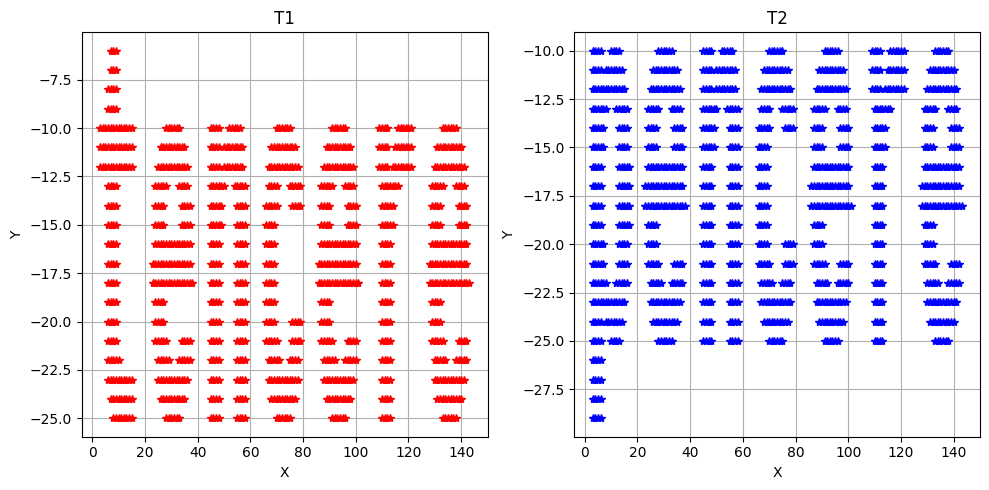

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot T1
axes[0].plot(T1[0, :], T1[1, :], '*r')
axes[0].set_title('T1')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True)

# Plot T2
axes[1].plot(T2[0, :], T2[1, :], '*b')
axes[1].set_title('T2')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### See them in 3D

In [4]:
# CELL 1
# also let's see these text in 3D
# note that text2mat actually provides data in 3D but with z=0, hence text is on XY plane
CMe(T1, f'{S1}')
CMe(T2, f'{S2}')

## Recall random uniform vs normal distribution
This implies noise will be added later in the assignment :)

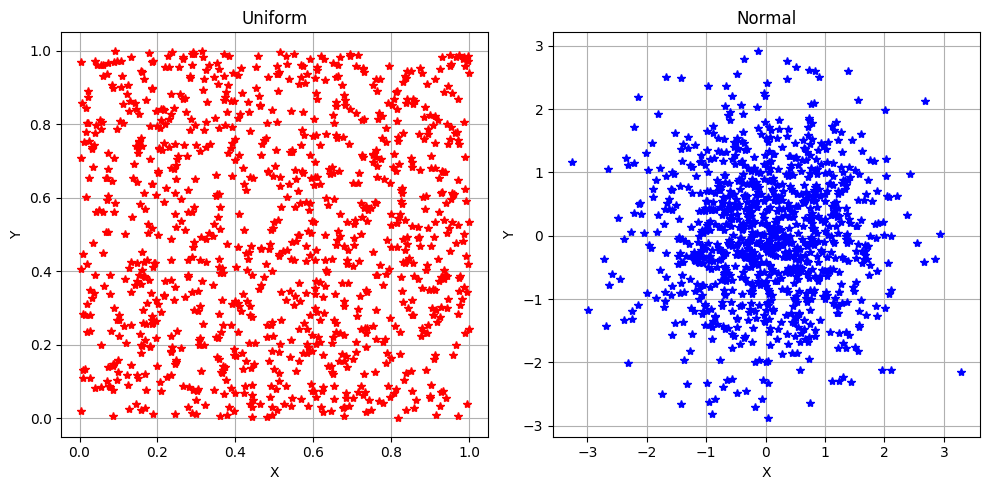

In [5]:
N1 = np.random.rand(2,1000)
N2 = np.random.randn(2,1000)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot N1
axes[0].plot(N1[0, :], N1[1, :], '*r')
axes[0].set_title('Uniform')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True)

# Plot N2
axes[1].plot(N2[0, :], N2[1, :], '*b')
axes[1].set_title('Normal')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Assignment starts here
Read the following cells carefully and respond by filling in the code and text cells. Your explanations brief yet clear.

You are to practice and hopefully get better if not excel in SVD usage at the end of this assignment.

## Let's generate some reference text as we did above.
I will change this text (i.e. ```S1,S2```) while grading, and run the following many times to see how your code works.  

You can try likewise, however, make sure that your submission does not involve any of your personal test code.  

I will refer the reference text using ```T1``` or ```T2``` in the remainder of this assignment. I might also use ```S1``` and ```T1``` interchangebly to refer to the same text content.

In [6]:
# similar to above, generate reference text
S1 = 'tencere'
S2 = 'pencere'
T1, T1num = text2mat(S1)
T2, T2num = text2mat(S2)

# let's make sure that we start with a 2D array, recall that text2mat function retuns a 3xK matrix with K data points
T1 = T1[0:2, :] # get only the XY coordinates of the data points, note that text2mat retuns 3D data points with z = 0
T2 = T2[0:2, :] # get only the XY coordinates of the data points, note that text2mat retuns 3D data points with z = 0

In [7]:
# CELL 2
Np = 3 # dimension of the ambient space to which data will be projected
B = np.random.rand(Np,2) # generate a random basis
ND_Data = B@T1 # convert or project 2D data points to Np Dimensions, in other words project data points onto a plane in some Np-Dimensional space
# we start with 3 dimensions so that we can view
# let's view the projected text in 3D
CMe(ND_Data)

### Explain - 1:
Run the above code couple of times to observe that the text ```T1``` is seen as if it is written in *italic*. It might even seem printed in reverse or its mirror image.

Briefly explain, why the text is not as readable as it is seen when 'CELL 1' under "See them in 3D" is run.


**HINT**: If you do not see the reason why, or the plot does not seem right at firt, try running this cell with ```Np=2``` couple of times in CELL 2

In CELL 1, the function CMe visualizes the original 3D data (T1 or T2) with
z=0. The data points are plotted directly on the XY plane without any transformation.

In CELL 2, the data is transformed using:

ND_Data = B @ T1

Here, B is a randomly generated
𝑁𝑝 × 2 matrix as the projection basis. The operation B @ T1 projects the 2D data onto a new 𝑁𝑝-dimensional space.

Also the basis matrix B is randomly generated, so the projection is arbitrary and often non-uniform. This leads to:

Shearing: Letters appear slanted or italicized.

Scaling

Reflection

Loss of Intuition: In new space, the original 2D relationships are not directly preserved. The text appears deformed because the transformation does not align with the original viewing plane.

The random B disrupts the inherent structure of the text.

Geometric relationships (e.g., parallel lines, proportions) in the 2D plane are distorted when projected into 3D.

### Fix the code in 'CELL 2' so that
It does look in the same shape despite it is always projected randomly to some plane in 3D.  

Note that if 3 is change with N, your code should also work for N-D.  

In [8]:
# when this cell is run, similar to 'CELL 2', text in T1 will be project onto a plane in Nd-Dimensions
# in order so that we can generate high dimensional data later in the assignment
# you are to fill in the following function

def DataInND(M, Nd = 3, NoiseLevel = 1.0, NoiseType = 'Normal'):
    '''
    M is a 2xK matrix, indicating that there are K data points in 2D
    Nd is the dimension to which data in M will be projected onto a random plane, Nd defaults to 3
    After projection Res is a NdxK matrix, it should be rank-2 at this point
    If NoiseLevel is not zero:
        a random matrix that is also NdxK and this matrix is added to the Res
        after being multiplied by NoiseLevel
    Random matrix is generated using randn() if NoiseType is 'Normal' else rand()

    Finally Res is returned
    '''
    Res = None

    B = np.random.rand(Nd, 2)

    Res = B @ M
    # Below part automatically generated by Github Copilot.
    # I use github copilot with my edu account to gain time.
    if NoiseLevel > 0.0:
        if NoiseType == 'Normal':
            Noise = np.random.randn(Nd, M.shape[1])
        else:
            Noise = np.random.rand(Nd, M.shape[1])
    # Copilot parts finished
        Res = Res + NoiseLevel * Noise

    return Res

# do not change the following
# if your function works, following should work
Nd = 3
ND_Data = DataInND(T1, Nd )

# at the end the following display the data in
if Nd == 3: # let's plot if it si viewable
    CMe(ND_Data)

## Let's move on to higher dimensions

Now, let's step by step move on to higher dimensions.  
First we will look at the no noise case and increase intensity

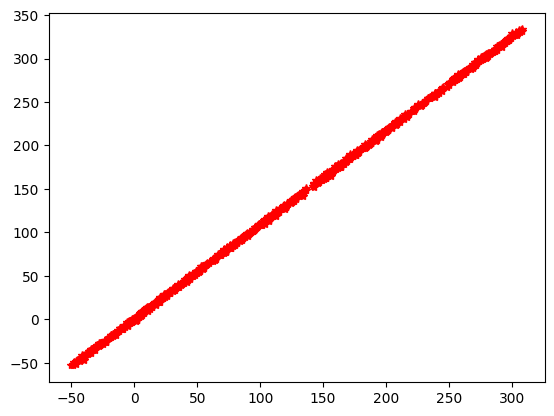

In [13]:
# using your function let's create data in Nd
Nd = 10
ND_Data = DataInND(T1, Nd = Nd) # note that no noise is added

# Your code starts here
# starting with ND_Data your code should project the text in T1 to a plane
# extract the X, Y coordinates
B_2D = np.random.rand(2, Nd)
Projected_2D = B_2D @ ND_Data
X = Projected_2D[0, :]
Y = Projected_2D[1, :]
# Your code ends here and X and Y cooridantes of the

# Plot the result
plt.plot(X,Y, 'r*')

### and there comes the noise

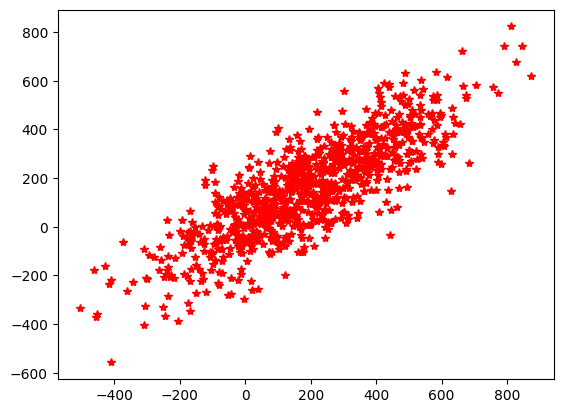

In [14]:
# using your function let's create data in Nd but this time noise will be added
# try differen values of noise, decrease, increase, run this cell many times
# get a good understanding of what happens then answer the questions below
ND_Data = DataInND(T1, Nd = 10, NoiseLevel=100) # note that no noise is added

# Your code starts here
# Despite the contamination in ND_Data
# your code should project the text in T1 to a plane
# and extract the X, Y coordinates
B_2D = np.random.rand(2, Nd)
Projected_2D = B_2D @ ND_Data
X = Projected_2D[0, :]
Y = Projected_2D[1, :]
# Your code ends here and X and Y cooridantes of the

# Plot the result in 2D
plt.plot(X,Y, 'r*')



### Explain - 2:
Both clear and noisy data should be handled in a very similar way, simply by using the first 2 left singular vectors and so on...  
However, data projected in 2D in both cases are they exactly the same?  
What is the difference? What can you say about noise filtering achieved via SVD in this case?
Briefly explain.


Clear Data:

The first two left singular vectors of the clear data closely capture the original geometry since the data is noise-free.

The resulting projection preserves the structure and is highly readable.

Noisy Data:

The noisy high-dimensional data introduces distortions to the original structure.

SVD effectively separates the data from the noise. Using the first two left singular vectors filters out much of the noise, but some distortions remain, depending on the noise level.

The first few singular values and their corresponding singular vectors represent the dominant structure (principal axis) of the data.

SVD decomposes a matrix into three components:

𝑀 = 𝑈Σ𝑉^⊤

U: Left singular vectors, represents the principal axes of the data in the high-dimensional space.

Σ: Singular values, diagonal matrix represents the magnitude of variance each principal axis.

V: Right singular vectors represents the relationships among data points.


## Let's fancy
Now write another function

In [15]:

def TwoOrthStrInND(T1, T2, Nd = 10, NoiseLevel = 0.0, NoiseType = 'Normal'):
    '''
    Accepts 2 data matrices of shape 2xK, preferably that comes from readable strings
    Let T1, T2 be two matrices of shape 2xK
    This function should project T1 and T2 to seperate and orthogonal planes in Nd-Dimensions
    and return Res.
    If we project points in Res on to the plane that is spanned by
    the first 2 lef-singular vectors T1 should be readable on the plot
    Similarly, if we project points in the result on to the plane that is spanned by
    the following 2 lef-singular vectors (i.e. the third and the fourth) T2 should be readable on the plot

    NoiseLevel and NoiseType is just like before, i.e.:
    Noise level generates a random matrix that is also NdxK and this matrix is added to the result
    after being multiplied by NoiseLevel
    Random matrix is generated using randn() if NoiseType is 'Normal' else rand()
    '''
    B1 = np.random.rand(Nd, 2)
    B2 = np.random.rand(Nd, 2)
    B2 = B2 - B1 @ (np.linalg.pinv(B1) @ B2) # Orthogonalize B2 with respect to B1

    T1_projected = B1 @ T1  # Shape: (Nd, K)
    T2_projected = B2 @ T2  # Shape: (Nd, K)

    Res = np.hstack([T1_projected, T2_projected])  # Shape: (Nd, 2K)
    # Again below code generated by Copilot
    if NoiseLevel > 0.0:
        if NoiseType == 'Normal':
            Noise = np.random.randn(*Res.shape)  # Gaussian noise
        else:
            Noise = np.random.rand(*Res.shape)  # Uniform noise
        Res += NoiseLevel * Noise  # Scale and add noise
    # Copilot parts finished. Copilot also write "Copilot parts finished" :d
    return Res


### Let's try

Let's recall that SVD of matrix $\mathbf{M}$ is:

$\mathbf{M} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$.

here let $u_1$ be the first column of $\mathbf{U}$, and in general $\mathbf{u}_i$ is the $i^{th}$ column of $\mathbf{U}$, or in other words $\mathbf{u}_i$ is the $i^{th}$ left-singular vector of $\mathbf{M}$.

If we project the outcome of ```TwoOrthStrInNd``` to the plane that is spanned by $\mathbf{u}_1, \mathbf{u}_2$, and plotted in 2D the text in ```T1``` should be readable. ```T2``` should not be visible even as a line. A point at the origin is of course acceptalbe.

Similarly, if we project the outcome of ```TwoOrthStrInNd``` to the plane that is spanned by $\mathbf{u}_3, \mathbf{u}_4$, and plotted in 2D the text in ```T2``` should be readable. Evidently, ```T1``` should not be visible, other than a point at the origin.

In [16]:
# CELL 3
# get the data in Nd
Nd_Data = TwoOrthStrInND(T1, T2, Nd = 10, NoiseLevel=3.0)

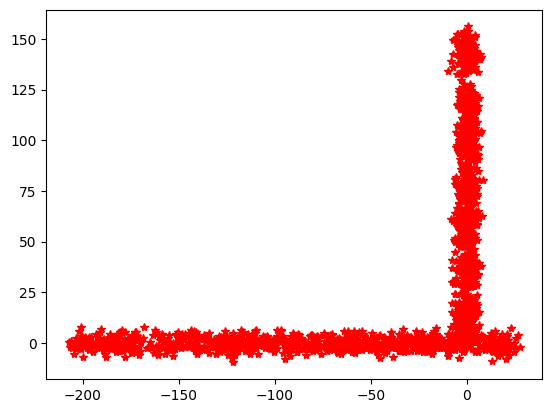

In [17]:
# Your code starts here
# proejct all data point in Nd_Data to the plane spanned by u1,u2 first and then plot in 2D
# let the coordinates of Nd_Data on this plane be X1, Y1

U, S, Vt = np.linalg.svd(Nd_Data, full_matrices=False)
U1_2 = U[:, :2]  # Shape: (Nd, 2)

Proj1 = U1_2.T @ Nd_Data  # Shape: (2, 2K), projection onto u1, u2

X1 = Proj1[0, :]
Y1 = Proj1[1, :]
# Your code ends here

# let's plot and see
plt.plot(X1, Y1, 'r*')

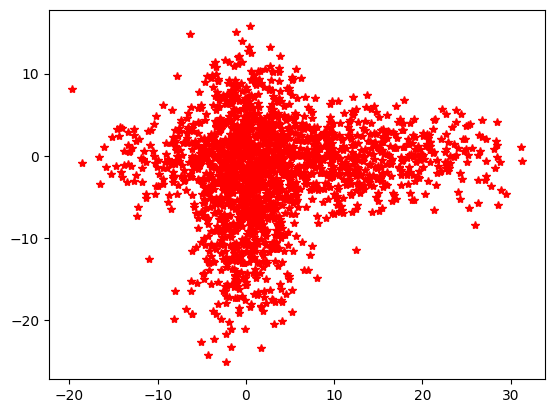

In [18]:
# Your code starts here
# proejct all data point in Nd_Data to the plane spanned by u3,u4 first and then plot
# let the coordinates of Nd_Data on this plane be X1, Y1
U3_4 = U[:, 2:4]

Proj2 = U3_4.T @ Nd_Data

X2 = Proj2[0, :]
Y2 = Proj2[1, :]
# Your code ends here

# let's plot and see
plt.plot(X2, Y2, 'r*')

### Explain - 3:
Going back to CELL 3, change noise level as you did before, observe what happens in your plots as noise gets heavier and explain what you see.

No noise or Low Noise:
Projection onto u1, u2 (Plane for T1):

T1 is visible.

T2 is not visible, reduced to a point at or near the origin.

Projection onto u3, u4 (Plane for T2):

T2 is clearly visible.

T1 is not visible, reduced to a point at or near the origin.

High Noise Levels:

Projection onto u1, u2:

The text structure of T1 becomes increasingly distorted.

Points are spread out, and noise distrupts the data, making the less organized.

T2 may start appearing faintly due to noise, no longer invisible.

Projection onto u3, u4:

The same distortion for T2, with increasing scatter.

Noise cause some of T1 to appear in the plot.


At low noise levels, the SVD effectively isolates the data and filters out the noise.

At high noise levels, the data becomes less dominant, singular values come close to each other, and noise distrupts the projections.


SVD relies on the orthogonality of singular vectors. Heavy noise disrupts this orthogonality, making the separation between T1 and T2 less distinct. The readability of T1 and T2 diminishes as noise increases.

## Even fancier: Consider this as bonus


In [175]:

def TwoFacesOfAPrism(T1, T2, Nd = 10, NoiseLevel = 0.0, NoiseType = 'Normal'):
    '''
    Similar to TwoOrthStrInND,
    Accepts 2 data matrices of shape 2xK, preferably that comes from readable strints
    Let T1, T2 be two matrices of shape 2xK
    This function should project T1 and T2 to seperate and orthogonal planes in Nd-Dimensions
    and return the resulting matrix: Res
    However, this time it is a bit different:
    If we reconstruct a rank-3 approximation of the result and use the coordiates of points in Res
    with respoect to the first 3 columns of the U matrix that is in rank-3 approximation
    this will result in a 3xK matrix and ploting this matrix using CMe() function,
    T1 and T2 should be on orthgonal planes
    i.e. if we rotate the plot so that T1 is readable, T2 should not be visible
    When this scene is propelry rotated by 90 degrees, T2 should be readable but not T1

    NoiseLevel and NoiseType is just like before, i.e.:
    Noise level generates a random matrix that is also NdxK and this matrix is added to the result
    after being multiplied by NoiseLevel
    Random matrix is generated using randn() if NoiseType is 'Normal' else rand()

    returns Res, i.e. a matrix of shape NdxK
    '''
    B1 = np.random.rand(Nd, 2)
    B2 = np.random.rand(Nd, 2)
    B2 = B2 - B1 @ (np.linalg.pinv(B1) @ B2) # Orthogonalize B2 with respect to B1

    B1[:2, :] = np.eye(2)  # Projection for T1 on x-y plane
    B2[1:3, :] = np.eye(2)  # Projection for T2 on y-z plane

    T1_projected = B1 @ T1  # Shape: (Nd, K)
    T2_projected = B2 @ T2  # Shape: (Nd, K)
    Res = np.hstack([T1_projected, T2_projected])  # Shape: (Nd, 2K)

    # Again below code generated by Copilot
    if NoiseLevel > 0.0:
        if NoiseType == 'Normal':
            Noise = np.random.randn(*Res.shape)  # Gaussian noise
        else:
            Noise = np.random.rand(*Res.shape)  # Uniform noise
        Res += NoiseLevel * Noise  # Scale and add noise
    # Copilot parts finished.

    return Res


### Let's try


In this case lets assume that $\tilde{\mathbf{M}}_3$ is the rank-3 approximation of $\mathbf{M}$.

Given that: $\mathbf{M} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, then

$\tilde{\mathbf{M}}_3 = \begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 & \mathbf{u}_3  \end{bmatrix}  \begin{bmatrix} \sigma_1 & 0 & 0 \\ 0 & \sigma_2 & 0 \\ 0 & 0 & \sigma_3 \end{bmatrix} \begin{bmatrix} \mathbf{v}_1^T \\ \mathbf{v}_2^T \\ \mathbf{v}_3^T   \end{bmatrix}$ = $\begin{bmatrix} \mathbf{u}_1 & \mathbf{u}_2 & \mathbf{u}_3  \end{bmatrix} \mathbf{C} $

Recall that $\mathbf{u}_i, \mathbf{v}_j$ are column vectors and columns of $\mathbf{C}$ contains the coordinates of points in $\mathbf{M}$ when they are projected down to $3D$.  

Therefore, finding $\mathbf{C}$ and plotting as follows:  
```CMe(C)```  
should provide the plot.  
When you rotate this plot so that ```S1``` is readable, ```S2``` should not be visible, and when you rotate the view properly for $90$$ degress, ```S2``` should be readable, but not ```S1```. This is as if you are vertically looking onto two neigbouring faces of a rectangular prism, and seeing different strings on each face.  

Check out the demo cell below. If you look at XY plane vertically, you should read ```FACE```, if you rotate it 90 degrees and look at XZ plane, you see just some random points. If you implement this part properly, on XY plane you should read ```S1``` and on XZ plane ```S2``` should be readable.

However, note that this implies more that just printing on the face of a prism, which is not the answer to this question. Becasue if you do so, when ```S1``` is printed, ```S2``` will show up as a line.

What is required is, when we look at the in the direction to see ```S1```, ```S2``` should not leave a mark on the scened, and vice versa in the no noise case. Of course noise will contaminate the scene and effect the result.


In [176]:
# demo cell
Tdemo, _ = text2mat('FACE')
Tdemo = Tdemo + np.random.randn(*Tdemo.shape)*0.01
CMe(Tdemo)

In [177]:
# CELL 4
# get the data in Nd
Nd_Data = TwoFacesOfAPrism(T1, T2, Nd = 10, NoiseLevel=0.0)

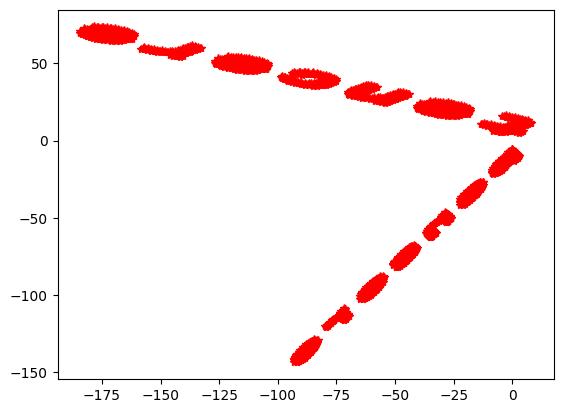

In [178]:
# Your code starts here
# proejct all data point in Nd_Data to the plane spanned by u1,u2 first and then plot in 2D
# let the coordinates of Nd_Data on this plane be X1, Y1
U, S, Vt = np.linalg.svd(Nd_Data, full_matrices=False)

U3 = U[:, :3]  # First 3 left singular vectors (u1, u2, u3)
S3 = np.diag(S[:3])  # First 3 singular values
V3 = Vt[:3, :]

C = S3 @ V3 # Coordinates in the 3D space spanned by u1, u2, u3

CMe(C)

U1_2 = U[:, :2]
Proj1 = U1_2.T @ Nd_Data
X1 = Proj1[0, :]
Y1 = Proj1[1, :]
# Your code ends here

# let's plot and see
plt.plot(X1, Y1, 'r*')

### Explain - 4:
Going back to CELL 4, change noise level as you did before, observe what happens in your plots as noise gets heavier and explain what you see.

**No or Low Noise:**

3D Plot with CMe(C):

The text in T1 and T2 is clearly visible.
When viewed along the u1,u2 plane, T1 is readable, and T2 is invisible.
When rotated to view along the u3, u4 plane, T2 is readable, and T1 is invisible.

2D Projections:

u1, u2: T1 is readable. T2 is reduced to a small cluster or a point near the origin.

u3, u4: T2 appears similarly, and T1 is reduced to a point or negligible presence.

**High Noise Levels:**

3D Plot with CMe(C):

T1 and T2 become harder to distinguish.
Noise leads to significant scatter in the points. Both T1 and T2 appear as random clusters (harder to find harmony?). The separation of orthogonal planes diminishes because of noise affects all directions.

2D Projections:

u1, u2 : T1 is highly distorted and barely readable. Noise dominates the plot, with points scattered randomly across the plane.T2 becomes visible as noise spreads it into u1, u2's plane, breaking the orthogonality.

u3, u4 : Similar effects occur, with T2 distorted and T1 faintly appearing due to noise.



At low noise levels, SVD effectively separates T1 and T2 onto orthogonal planes.

As noise increases, the orthogonality between T1 and T2 gone, causing them to "leak"(I find that term from leakyReLu Idk it is correct use) into each other's projections.

Low noise levels preserve the dominant data, with noise introducing minor scatter.
High noise levels reduce the data's power, making it harder to isolate T1 and T2 in projections.

SVD helps filter noise by focusing on the dominant singular vectors (u1, u2, u3).
However, as noise levels rise, even the dominant singular vectors become close to each other, reducing the effectiveness of SVD.
